Processing dataset: Migraine


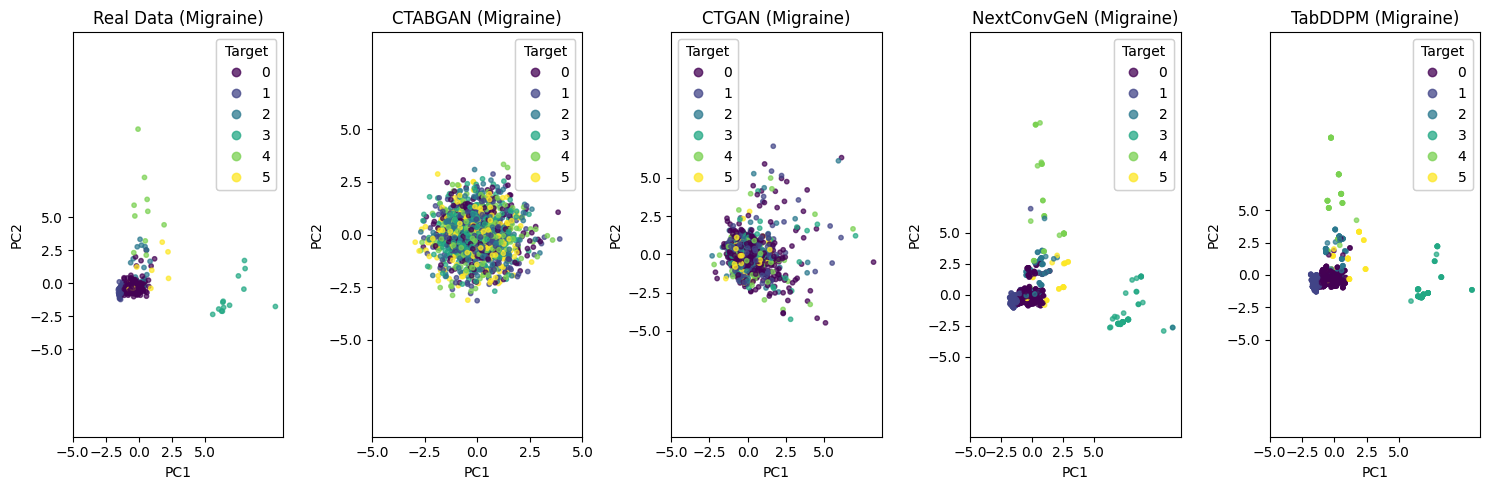

Processing dataset: Stroke


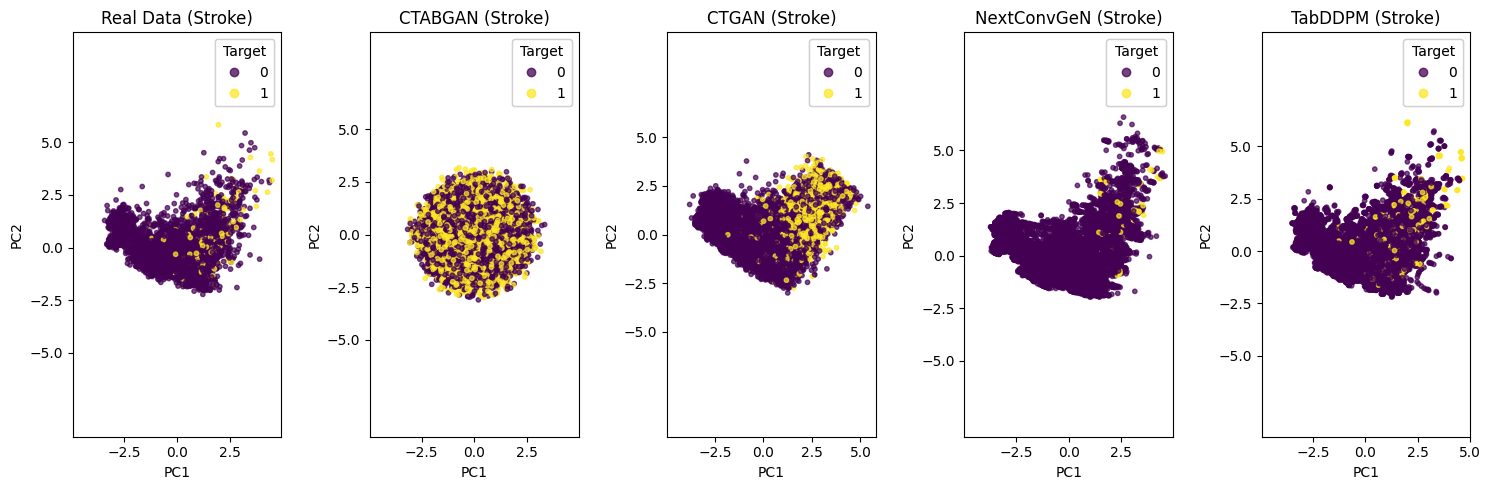

Processing dataset: LiverCirrhosis


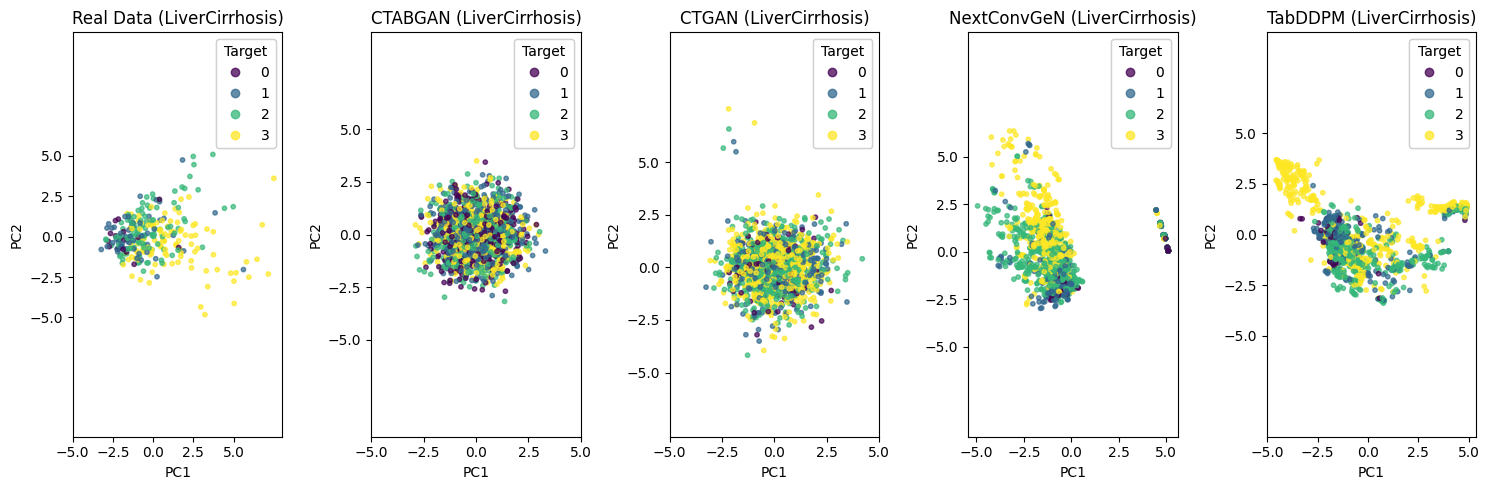

Processing dataset: LungCancer


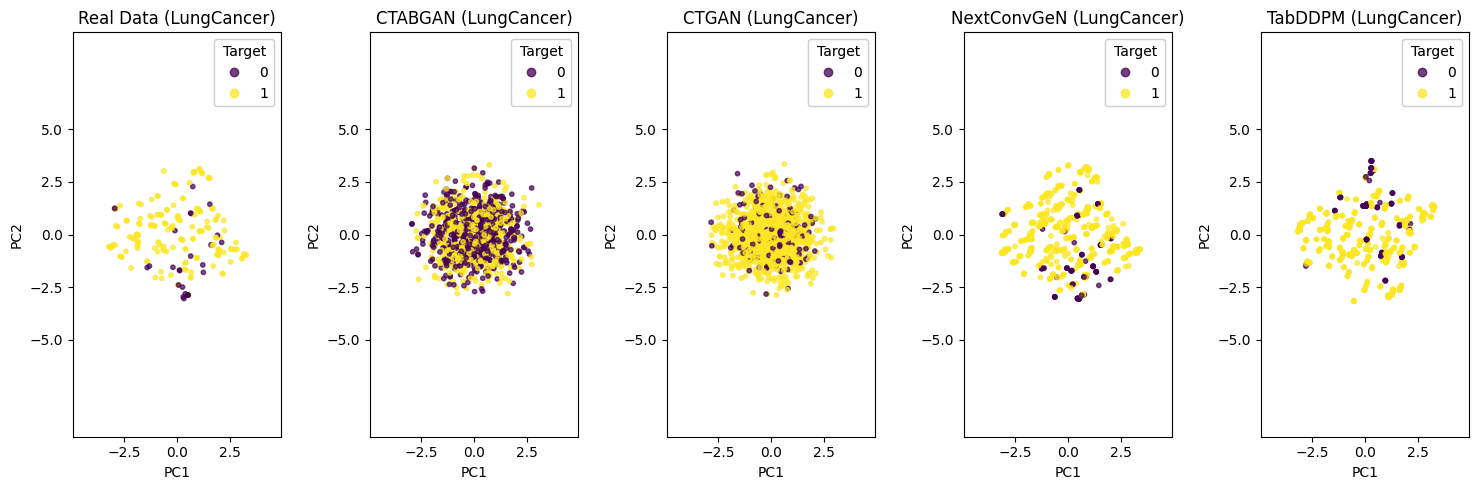

Processing dataset: ContraceptiveMethods


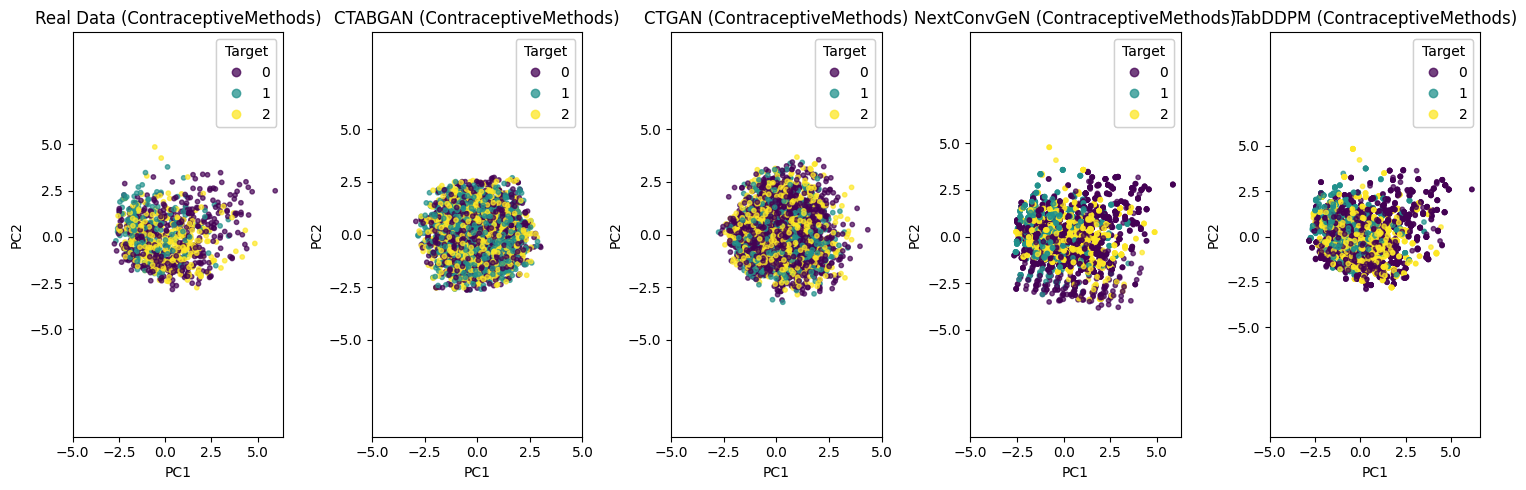

Processing dataset: HeartDisease


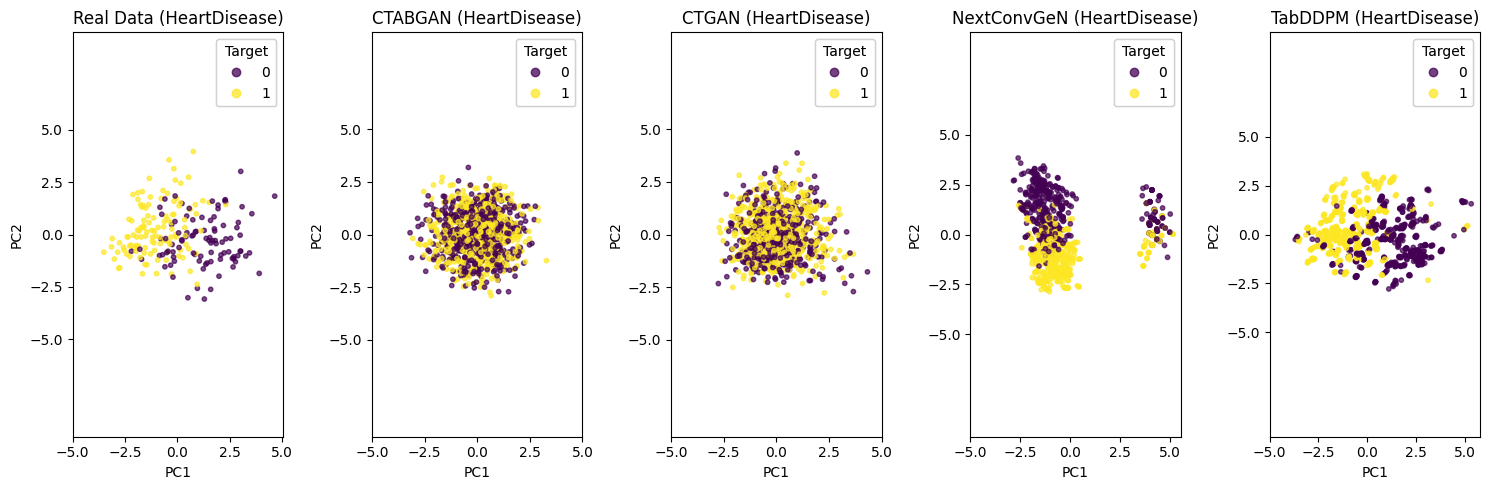

Processing dataset: HeartFailure


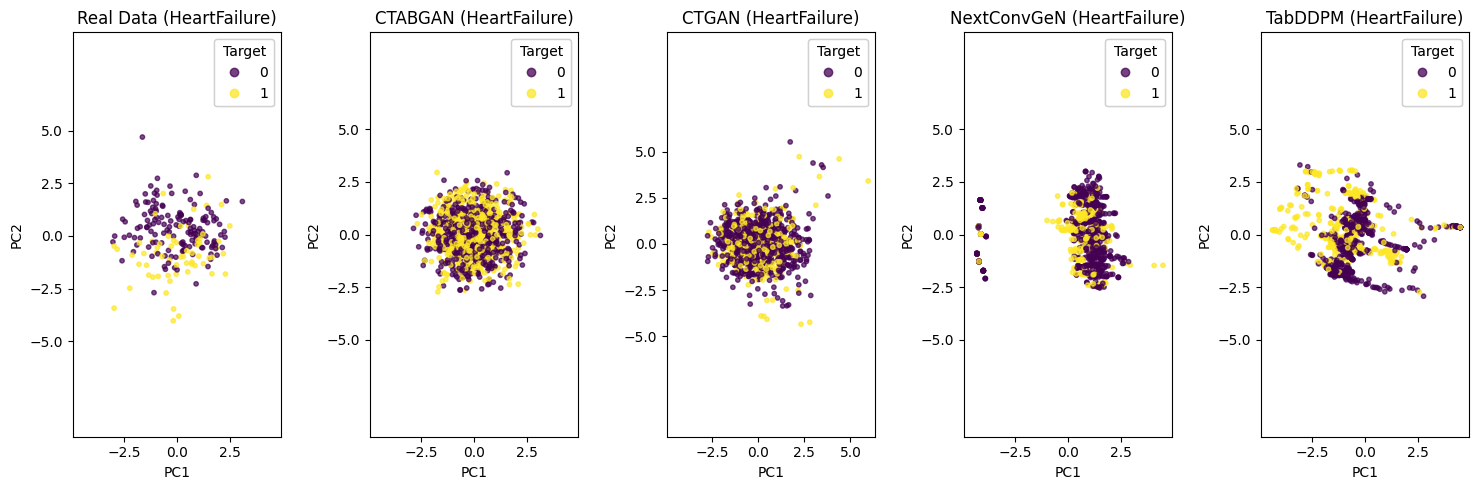

Processing dataset: IndianLiverPatients


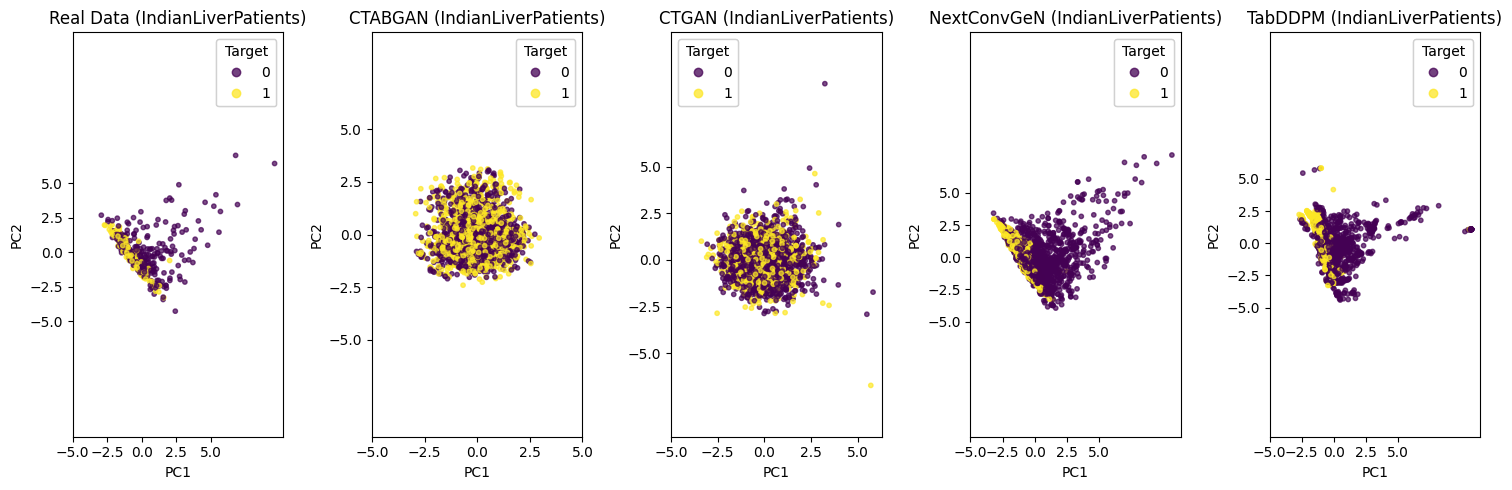

Processing dataset: Obesity


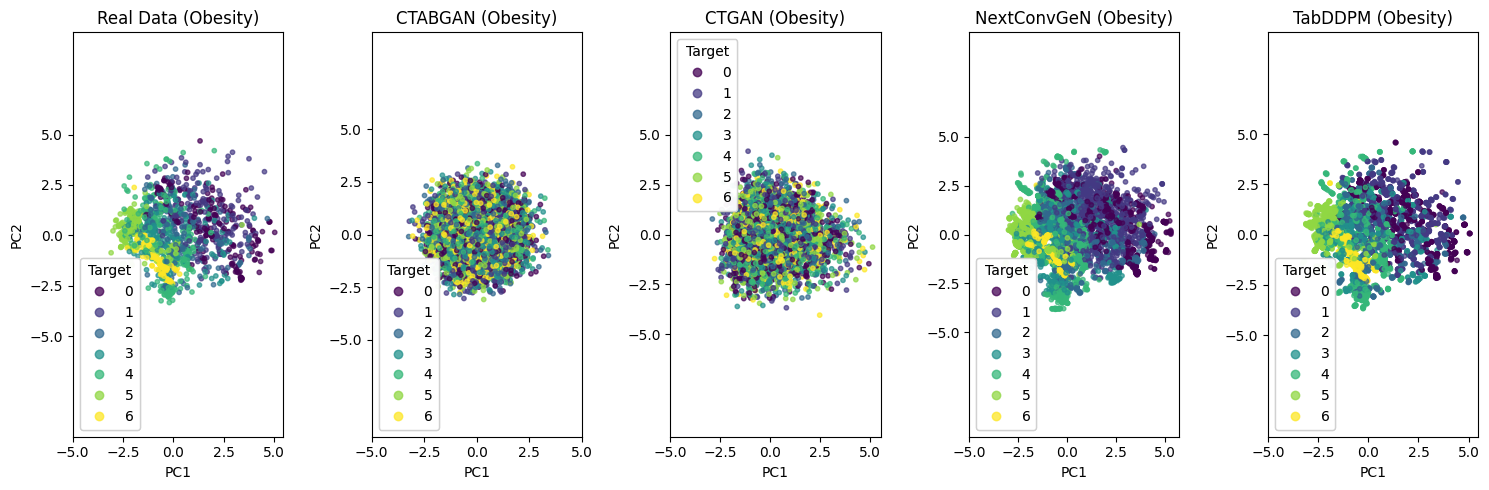

Processing dataset: PimaIndianDiabetes


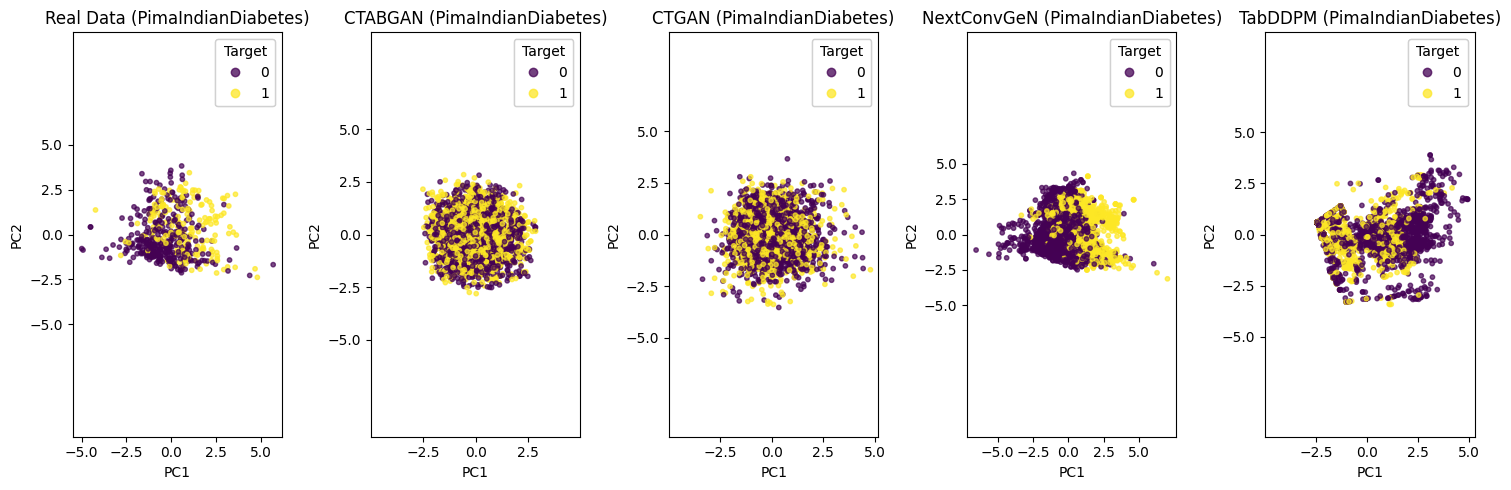

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import json

# Dataset and model names
dataset_names = ["Migraine", "Stroke", "LiverCirrhosis", "LungCancer", "ContraceptiveMethods", "HeartDisease", "HeartFailure", "IndianLiverPatients", "Obesity", "PimaIndianDiabetes"]
model_names = ["CTABGAN", "CTGAN", "NextConvGeN", "TabDDPM"]

# Paths to the folders
prepared_data_path = "./PreparedData1"
synthetic_data_path = "./t1_SyntheticData"

# Function to load and normalize data, removing the target column
def load_and_normalize_data(file_path, target_column=None):
    data = pd.read_csv(file_path)
    if target_column:
        data_features = data.drop(columns=[target_column])
        target = data[target_column]
    else:
        data_features = data
        target = None
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_features)
    return normalized_data, target

# Function to perform PCA and return 2 principal components
def perform_pca(data):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)
    return pca_data

# Function to plot PCA data with target labels
def plot_pca_with_target(data, target, title, ax):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis', alpha=0.7, s=10)
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_aspect('equal', adjustable='datalim')
    if target is not None:
        legend = ax.legend(*scatter.legend_elements(), title="Target")
        ax.add_artist(legend)

# Process each dataset and create plots
for dataset in dataset_names:
    print(f"Processing dataset: {dataset}")
    fig, axes = plt.subplots(1, len(model_names) + 1, figsize=(15, 5))  # Real + 4 synthetic plots

    # Load target column name from additional_info.json
    additional_info_path = os.path.join(prepared_data_path, dataset, "supervised", "additional_info.json")
    if os.path.exists(additional_info_path):
        with open(additional_info_path, 'r') as f:
            additional_info = json.load(f)
        target_column = additional_info.get("target")[0]
    else:
        print(f"Additional info not found for dataset: {dataset}")
        target_column = None

    # Load and process real data
    real_data_path = os.path.join(prepared_data_path, dataset, "supervised", "training_data.csv")
    if os.path.exists(real_data_path):
        real_data, real_target = load_and_normalize_data(real_data_path, target_column)
        real_pca = perform_pca(real_data)
        plot_pca_with_target(real_pca, real_target, f"Real Data ({dataset})", axes[0])
    else:
        print(f"Real data not found for dataset: {dataset}")

    # Load and process synthetic data for each model
    for i, model in enumerate(model_names):
        synthetic_data_path_model = os.path.join(synthetic_data_path, model, dataset, "supervised", "synthetic_data.csv")
        if os.path.exists(synthetic_data_path_model):
            synthetic_data, synthetic_target = load_and_normalize_data(synthetic_data_path_model, target_column)
            synthetic_pca = perform_pca(synthetic_data)
            plot_pca_with_target(synthetic_pca, synthetic_target, f"{model} ({dataset})", axes[i + 1])
        else:
            print(f"Synthetic data not found for model {model} and dataset {dataset}")

    # Set same ticks for all plots
    x_ticks = np.linspace(-5, 5, 5)
    y_ticks = np.linspace(-5, 5, 5)
    for ax in axes:
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)

    plt.tight_layout()
    plt.show()


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import json

# Dataset and model names
dataset_names = ["Migraine", "Stroke", "LiverCirrhosis", "LungCancer", "ContraceptiveMethods", "HeartDisease", "HeartFailure", "IndianLiverPatients", "Obesity", "PimaIndianDiabetes"]
model_names = ["CTABGAN", "CTGAN", "NextConvGeN", "TabDDPM"]

# Paths to the folders
prepared_data_path = "./PreparedData1"
synthetic_data_path = "./t1_SyntheticData"

# Function to load and normalize data, removing the target column
def load_and_normalize_data(file_path, target_column=None):
    data = pd.read_csv(file_path)
    if target_column:
        data_features = data.drop(columns=[target_column])
        target = data[target_column]
    else:
        data_features = data
        target = None
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_features)
    return normalized_data, target

# Function to perform PCA and return 2 principal components
def perform_pca(data):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)
    return pca_data

# Function to plot PCA data with target labels
def plot_pca_with_target(data, target, title, ax):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis', alpha=0.7, s=10)
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_aspect('equal', adjustable='datalim')
    if target is not None:
        legend = ax.legend(*scatter.legend_elements(), title="Target")
        ax.add_artist(legend)

# Save plots to a single PDF
pdf_path = "pca_plots.pdf"
with PdfPages(pdf_path) as pdf:
    for dataset in dataset_names:
        print(f"Processing dataset: {dataset}")
        fig, axes = plt.subplots(1, len(model_names) + 1, figsize=(15, 5))  # Real + 4 synthetic plots

        # Load target column name from additional_info.json
        additional_info_path = os.path.join(prepared_data_path, dataset, "supervised", "additional_info.json")
        if os.path.exists(additional_info_path):
            with open(additional_info_path, 'r') as f:
                additional_info = json.load(f)
            target_column = additional_info.get("target")[0]
        else:
            print(f"Additional info not found for dataset: {dataset}")
            target_column = None

        # Load and process real data
        real_data_path = os.path.join(prepared_data_path, dataset, "supervised", "training_data.csv")
        if os.path.exists(real_data_path):
            real_data, real_target = load_and_normalize_data(real_data_path, target_column)
            real_pca = perform_pca(real_data)
            plot_pca_with_target(real_pca, real_target, f"Real Data ({dataset})", axes[0])
        else:
            print(f"Real data not found for dataset: {dataset}")

        # Load and process synthetic data for each model
        for i, model in enumerate(model_names):
            synthetic_data_path_model = os.path.join(synthetic_data_path, model, dataset, "supervised", "synthetic_data.csv")
            if os.path.exists(synthetic_data_path_model):
                synthetic_data, synthetic_target = load_and_normalize_data(synthetic_data_path_model, target_column)
                synthetic_pca = perform_pca(synthetic_data)
                plot_pca_with_target(synthetic_pca, synthetic_target, f"{model} ({dataset})", axes[i + 1])
            else:
                print(f"Synthetic data not found for model {model} and dataset {dataset}")

        plt.tight_layout()
        pdf.savefig(fig, dpi=300)  # Save the current figure to the PDF with high resolution
        plt.close(fig)

print(f"All plots have been saved to {pdf_path}")


Processing dataset: Migraine
Processing dataset: Stroke
Processing dataset: LiverCirrhosis
Processing dataset: LungCancer
Processing dataset: ContraceptiveMethods
Processing dataset: HeartDisease
Processing dataset: HeartFailure
Processing dataset: IndianLiverPatients
Processing dataset: Obesity
Processing dataset: PimaIndianDiabetes
All plots have been saved to pca_plots.pdf


Processing dataset: Migraine


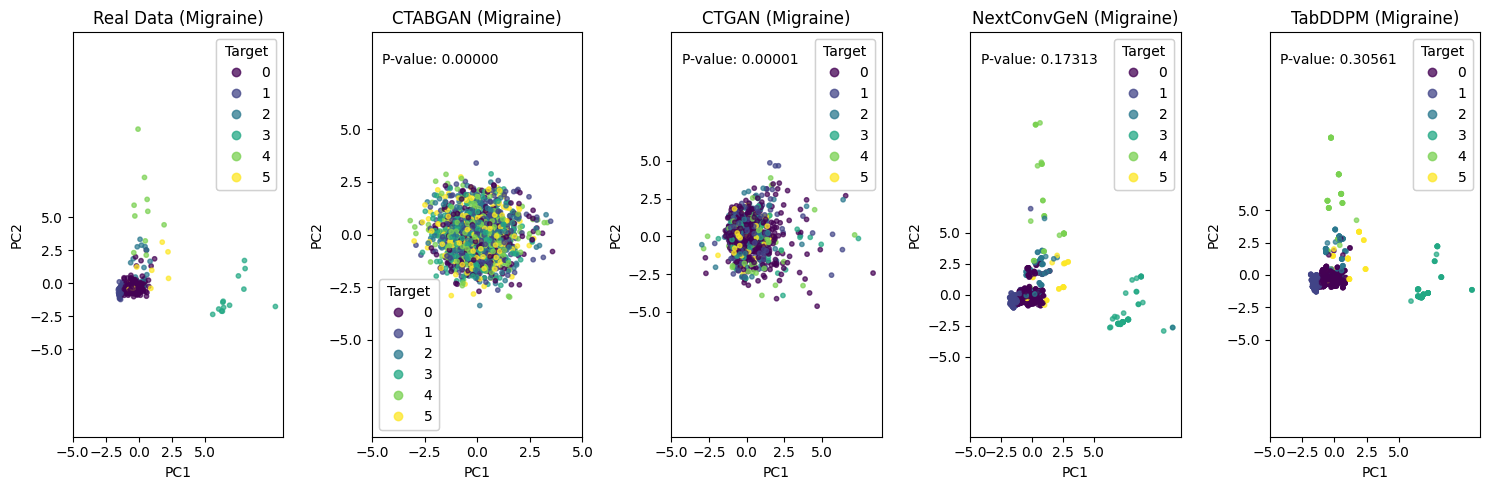

Processing dataset: Stroke


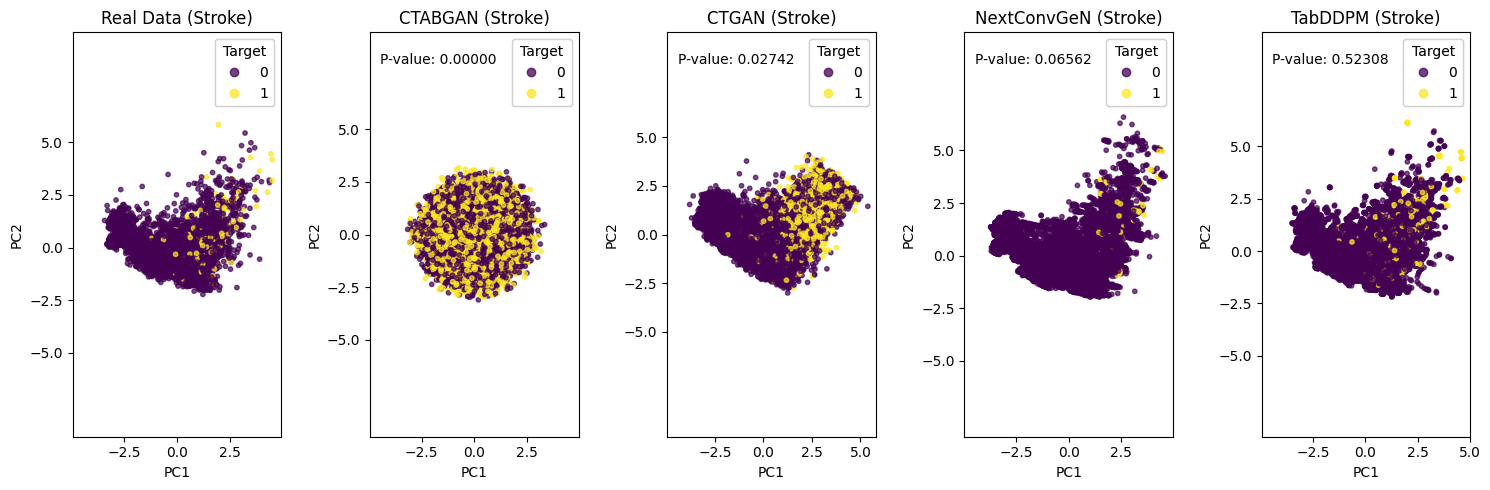

Processing dataset: LiverCirrhosis


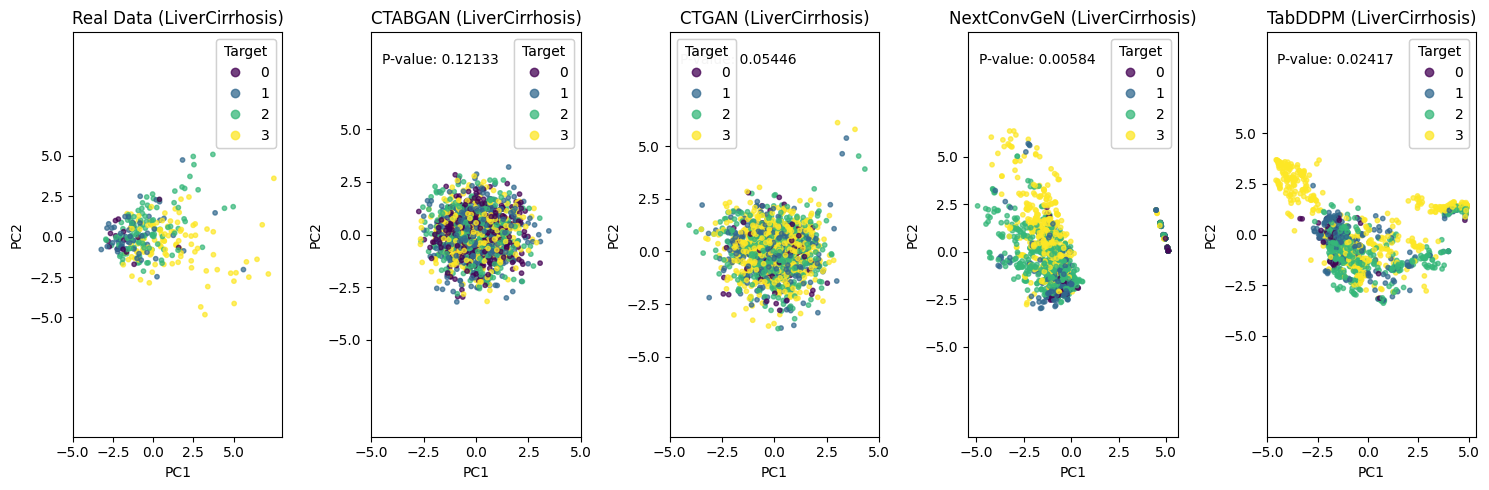

Processing dataset: LungCancer


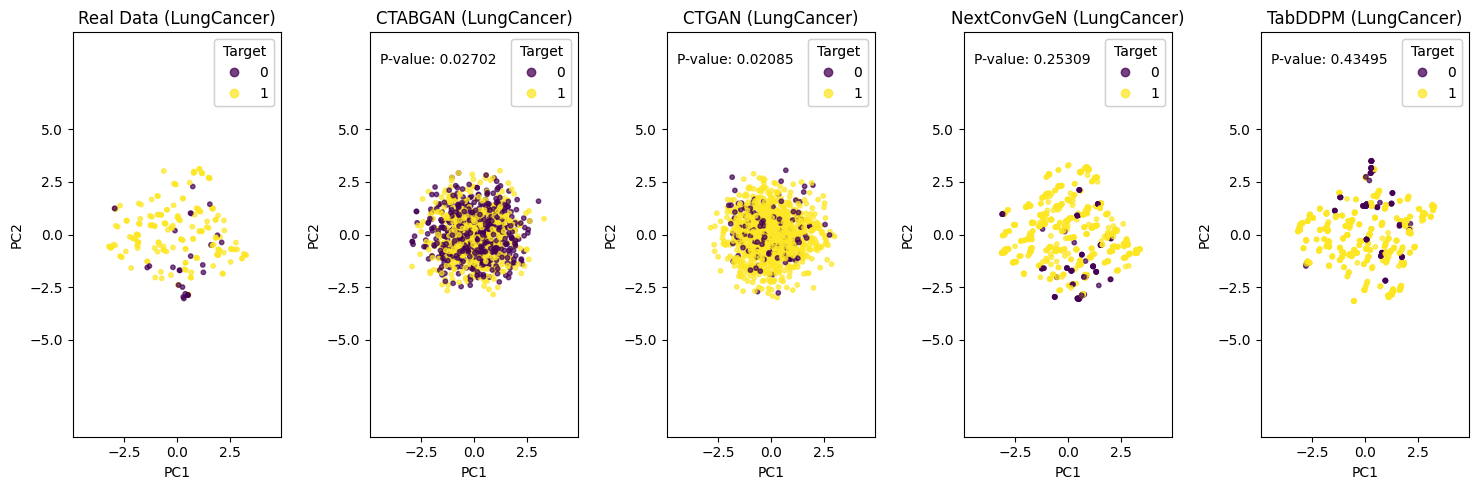

Processing dataset: ContraceptiveMethods


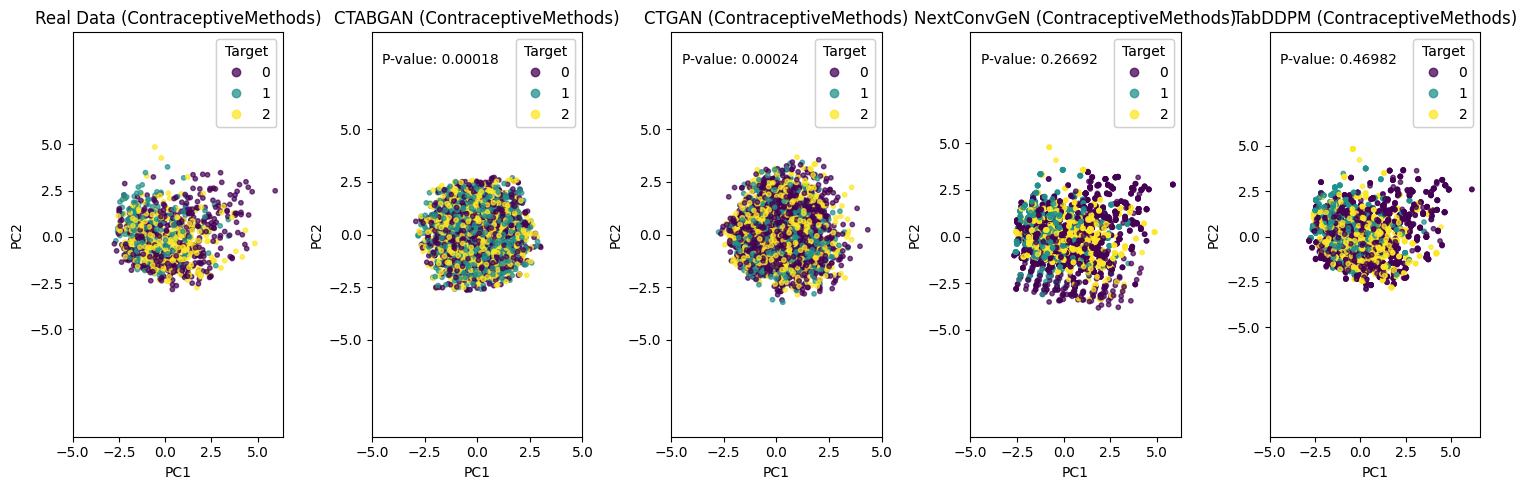

Processing dataset: HeartDisease


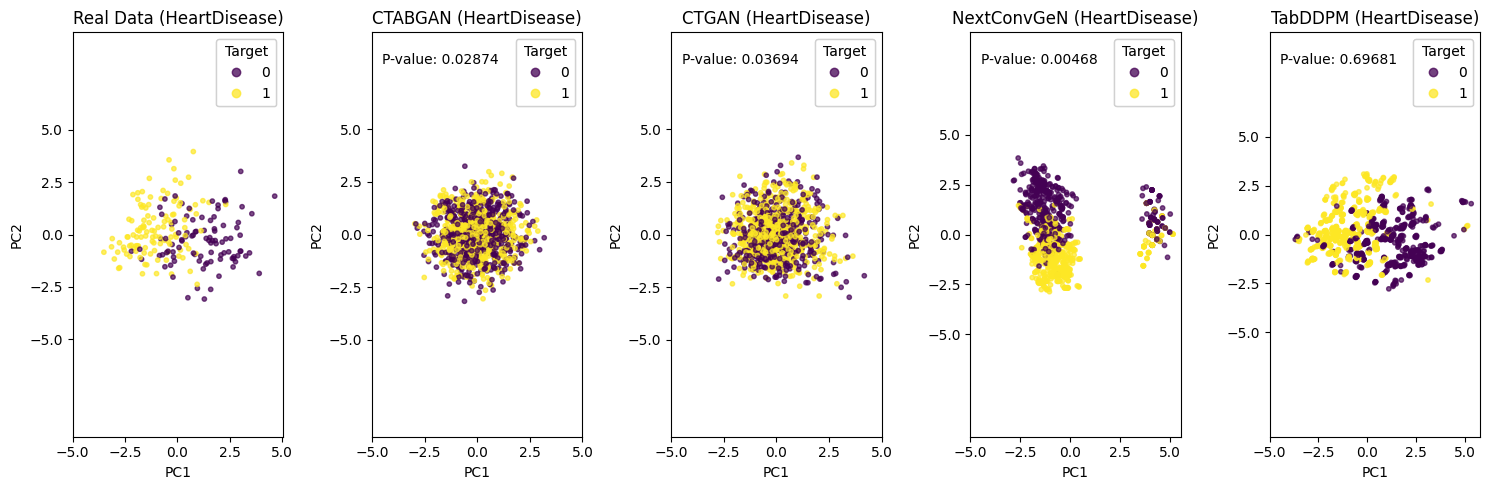

Processing dataset: HeartFailure


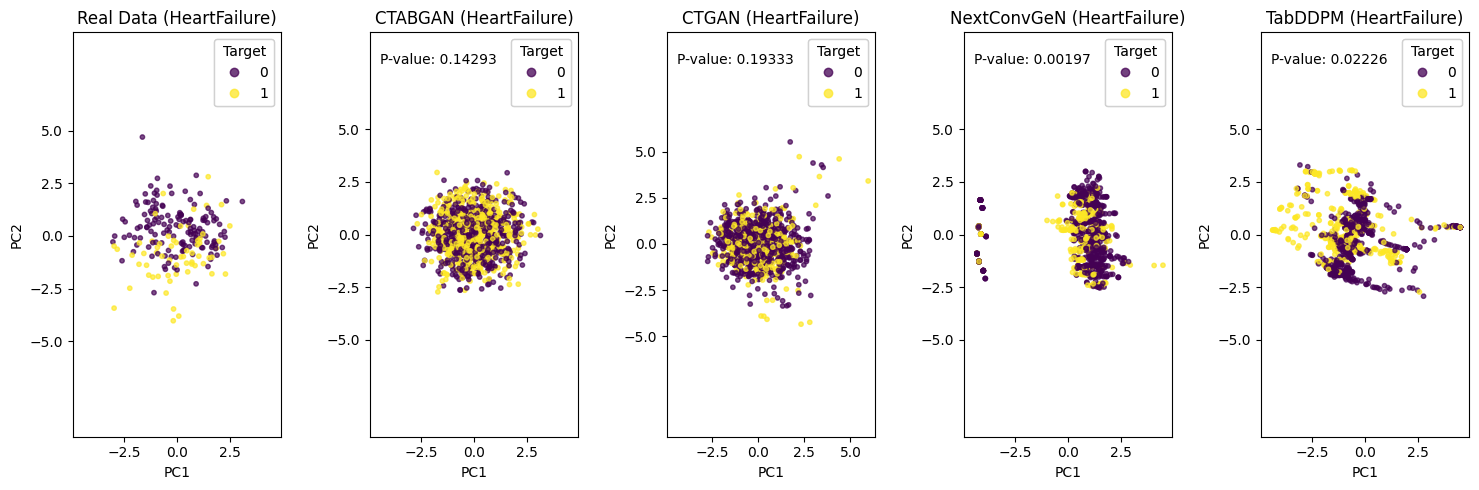

Processing dataset: IndianLiverPatients


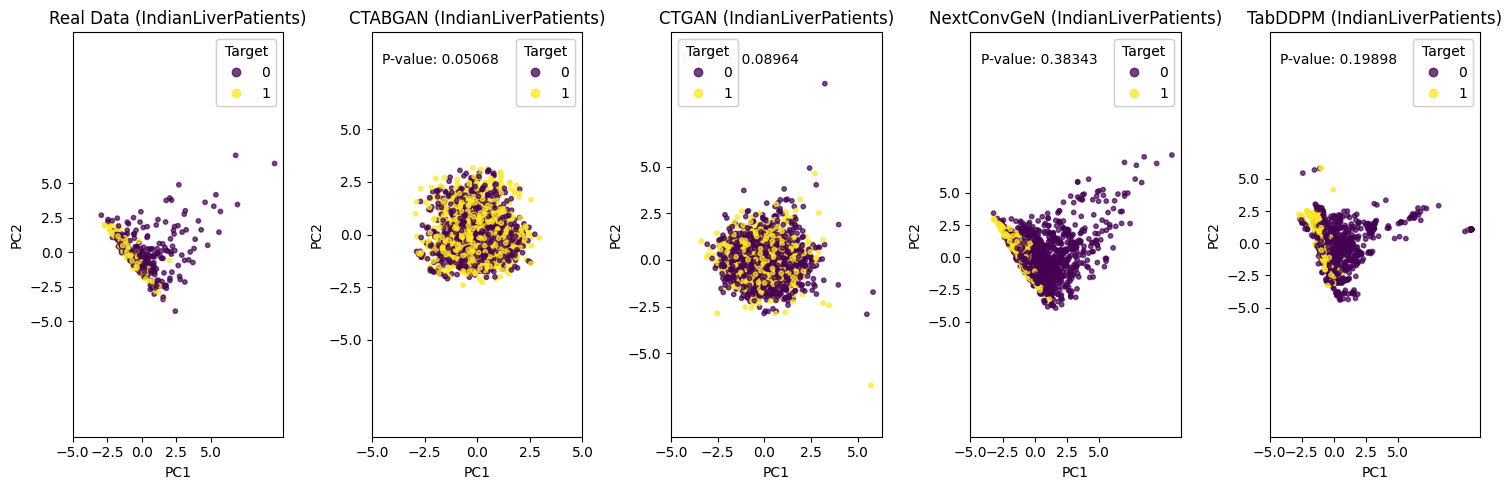

Processing dataset: Obesity


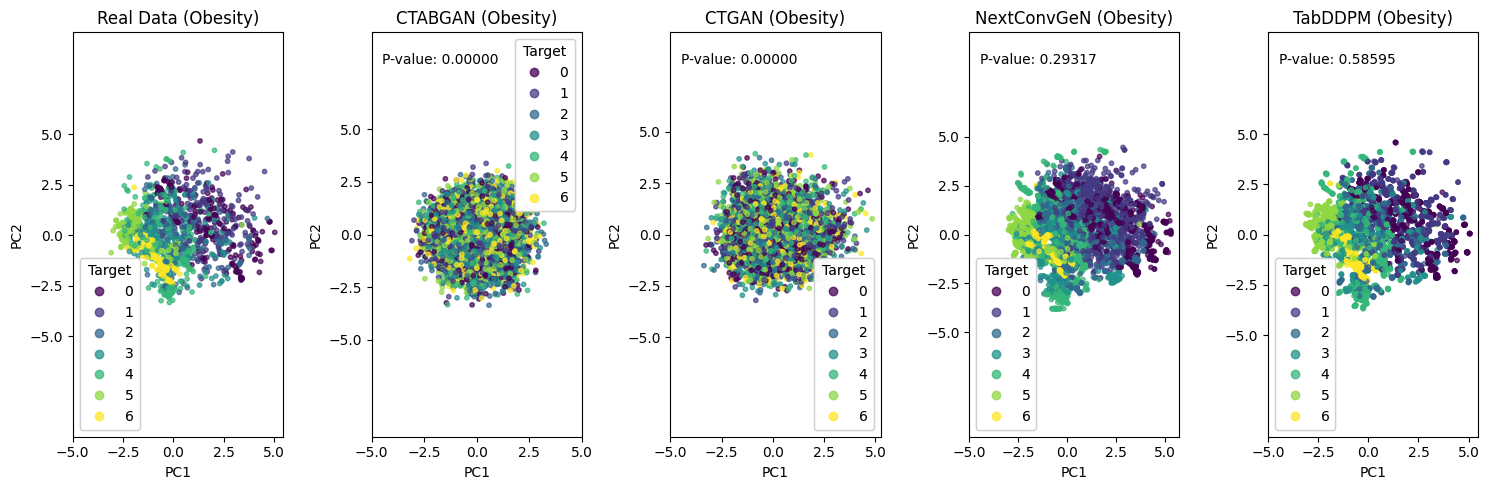

Processing dataset: PimaIndianDiabetes


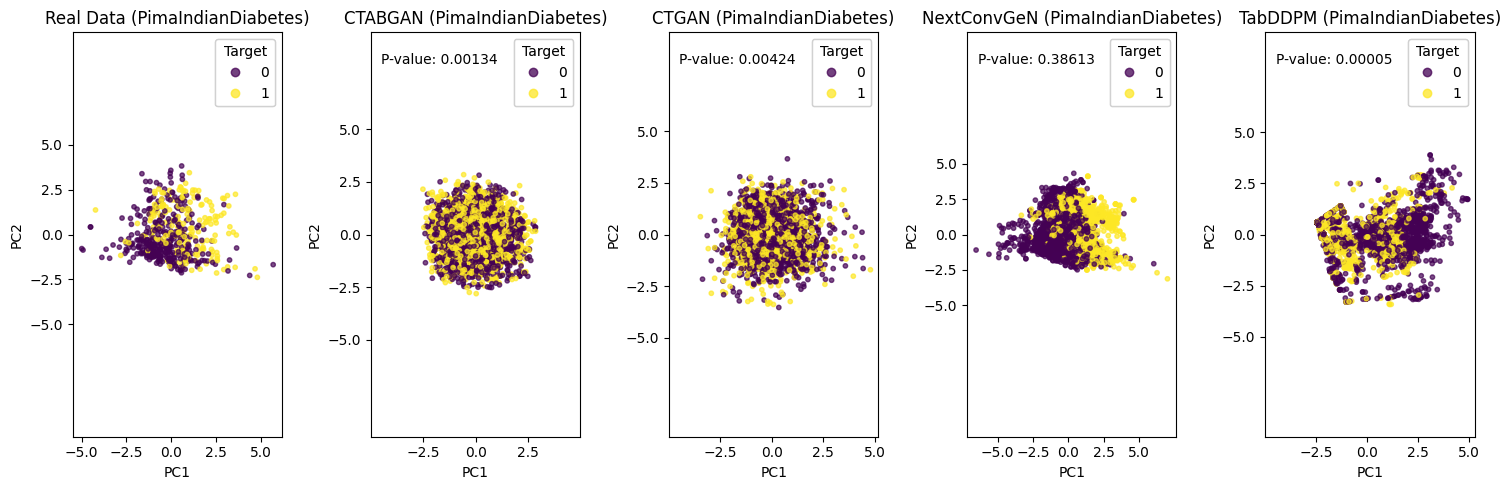

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import json
from scipy.stats import norm

# Dataset and model names
dataset_names = ["Migraine", "Stroke", "LiverCirrhosis", "LungCancer", "ContraceptiveMethods", "HeartDisease", "HeartFailure", "IndianLiverPatients", "Obesity", "PimaIndianDiabetes"]
model_names = ["CTABGAN", "CTGAN", "NextConvGeN", "TabDDPM"]

# Paths to the folders
prepared_data_path = "./PreparedData1"
synthetic_data_path = "./t1_SyntheticData"

# Custom Peacock Test Implementation
def peacock_test(sample1, sample2):
    """
    Perform a two-sample Peacock test for multivariate distributions.

    Parameters:
    - sample1: np.ndarray, shape (n1, d), the first sample of size n1 in d dimensions.
    - sample2: np.ndarray, shape (n2, d), the second sample of size n2 in d dimensions.

    Returns:
    - p_value: float, the p-value for the test.
    """
    n1, d1 = sample1.shape
    n2, d2 = sample2.shape

    if d1 != d2:
        raise ValueError("Samples must have the same dimensionality.")

    # Combine the samples
    combined_sample = np.vstack((sample1, sample2))
    n_combined = combined_sample.shape[0]

    # Create ECDF grids
    max_values = combined_sample.max(axis=0)
    min_values = combined_sample.min(axis=0)
    grid = np.linspace(min_values, max_values, n_combined, axis=0)

    # Calculate ECDFs
    ecdf1 = np.array([np.mean(np.all(sample1 <= point, axis=1)) for point in grid])
    ecdf2 = np.array([np.mean(np.all(sample2 <= point, axis=1)) for point in grid])

    # Test statistic: maximum absolute difference between the two ECDFs
    test_statistic = np.max(np.abs(ecdf1 - ecdf2))

    # Calculate p-value
    sqrt_term = np.sqrt((n1 * n2) / (n1 + n2))
    z_statistic = test_statistic * sqrt_term
    p_value = 2 * (1 - norm.cdf(z_statistic))  # Two-sided p-value

    return p_value

# Function to load and normalize data, removing the target column
def load_and_normalize_data(file_path, target_column=None):
    data = pd.read_csv(file_path)
    if target_column:
        data_features = data.drop(columns=[target_column])
        target = data[target_column]
    else:
        data_features = data
        target = None
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_features)
    return normalized_data, target

# Function to perform PCA and return 2 principal components
def perform_pca(data):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)
    return pca_data

# Function to plot PCA data with target labels and p-values
def plot_pca_with_target(data, target, title, ax, p_value=None):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis', alpha=0.7, s=10)
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_aspect('equal', adjustable='datalim')
    if target is not None:
        legend = ax.legend(*scatter.legend_elements(), title="Target")
        ax.add_artist(legend)
    if p_value is not None:
        ax.text(0.05, 0.95, f"P-value: {p_value:.5f}", transform=ax.transAxes, fontsize=10, verticalalignment='top')

# Process each dataset and create plots
for dataset in dataset_names:
    print(f"Processing dataset: {dataset}")
    fig, axes = plt.subplots(1, len(model_names) + 1, figsize=(15, 5))  # Real + 4 synthetic plots

    # Load target column name from additional_info.json
    additional_info_path = os.path.join(prepared_data_path, dataset, "supervised", "additional_info.json")
    if os.path.exists(additional_info_path):
        with open(additional_info_path, 'r') as f:
            additional_info = json.load(f)
        target_column = additional_info.get("target")[0]
    else:
        print(f"Additional info not found for dataset: {dataset}")
        target_column = None

    # Load and process real data
    real_data_path = os.path.join(prepared_data_path, dataset, "supervised", "training_data.csv")
    if os.path.exists(real_data_path):
        real_data, real_target = load_and_normalize_data(real_data_path, target_column)
        real_pca = perform_pca(real_data)
        plot_pca_with_target(real_pca, real_target, f"Real Data ({dataset})", axes[0])
    else:
        print(f"Real data not found for dataset: {dataset}")
        continue

    # Load and process synthetic data for each model
    for i, model in enumerate(model_names):
        synthetic_data_path_model = os.path.join(synthetic_data_path, model, dataset, "supervised", "synthetic_data.csv")
        if os.path.exists(synthetic_data_path_model):
            synthetic_data, synthetic_target = load_and_normalize_data(synthetic_data_path_model, target_column)
            synthetic_pca = perform_pca(synthetic_data)

            # Compute p-value using the custom Peacock test
            p_value = peacock_test(real_pca, synthetic_pca)

            plot_pca_with_target(synthetic_pca, synthetic_target, f"{model} ({dataset})", axes[i + 1], p_value)
        else:
            print(f"Synthetic data not found for model {model} and dataset {dataset}")

    # Set same ticks for all plots
    x_ticks = np.linspace(-5, 5, 5)
    y_ticks = np.linspace(-5, 5, 5)
    for ax in axes:
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)

    plt.tight_layout()
    plt.show()


In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import norm
import json

# Dataset and model names
dataset_names = ["Migraine", "Stroke", "LiverCirrhosis", "LungCancer", "ContraceptiveMethods", "HeartDisease", "HeartFailure", "IndianLiverPatients", "Obesity", "PimaIndianDiabetes"]
model_names = ["CTABGAN", "CTGAN", "NextConvGeN", "TabDDPM"]

# Paths to the folders
prepared_data_path = "./PreparedData1"
synthetic_data_path = "./t1_SyntheticData"

# Custom Peacock Test Implementation
def peacock_test(sample1, sample2):
    """
    Perform a two-sample Peacock test for multivariate distributions.

    Parameters:
    - sample1: np.ndarray, shape (n1, d), the first sample of size n1 in d dimensions.
    - sample2: np.ndarray, shape (n2, d), the second sample of size n2 in d dimensions.

    Returns:
    - p_value: float, the p-value for the test.
    """
    n1, d1 = sample1.shape
    n2, d2 = sample2.shape

    if d1 != d2:
        raise ValueError("Samples must have the same dimensionality.")

    # Combine the samples
    combined_sample = np.vstack((sample1, sample2))
    n_combined = combined_sample.shape[0]

    # Create ECDF grids
    max_values = combined_sample.max(axis=0)
    min_values = combined_sample.min(axis=0)
    grid = np.linspace(min_values, max_values, n_combined, axis=0)

    # Calculate ECDFs
    ecdf1 = np.array([np.mean(np.all(sample1 <= point, axis=1)) for point in grid])
    ecdf2 = np.array([np.mean(np.all(sample2 <= point, axis=1)) for point in grid])

    # Test statistic: maximum absolute difference between the two ECDFs
    test_statistic = np.max(np.abs(ecdf1 - ecdf2))

    # Calculate p-value
    sqrt_term = np.sqrt((n1 * n2) / (n1 + n2))
    z_statistic = test_statistic * sqrt_term
    p_value = 2 * (1 - norm.cdf(z_statistic))  # Two-sided p-value

    return p_value

# Function to load and normalize data, removing the target column
def load_and_normalize_data(file_path, target_column=None):
    data = pd.read_csv(file_path)
    if target_column:
        data_features = data.drop(columns=[target_column])
        target = data[target_column]
    else:
        data_features = data
        target = None
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_features)
    return normalized_data, target

# Function to perform PCA and return 2 principal components
def perform_pca(data):
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data)
    return pca_data

# Function to plot PCA data with target labels and p-values
def plot_pca_with_target(data, target, title, ax, p_value=None):
    scatter = ax.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis', alpha=0.7, s=10)
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_aspect('equal', adjustable='datalim')
    if target is not None:
        legend = ax.legend(*scatter.legend_elements(), title="Target")
        ax.add_artist(legend)
    if p_value is not None:
        ax.text(0.05, 0.95, f"P-value: {p_value:.5f}", transform=ax.transAxes, fontsize=10, verticalalignment='top')

# Save plots to a single PDF
pdf_path = "pca_plots_with_pvalues.pdf"
with PdfPages(pdf_path) as pdf:
    for dataset in dataset_names:
        print(f"Processing dataset: {dataset}")
        fig, axes = plt.subplots(1, len(model_names) + 1, figsize=(15, 5))  # Real + 4 synthetic plots

        # Load target column name from additional_info.json
        additional_info_path = os.path.join(prepared_data_path, dataset, "supervised", "additional_info.json")
        if os.path.exists(additional_info_path):
            with open(additional_info_path, 'r') as f:
                additional_info = json.load(f)
            target_column = additional_info.get("target")[0]
        else:
            print(f"Additional info not found for dataset: {dataset}")
            target_column = None

        # Load and process real data
        real_data_path = os.path.join(prepared_data_path, dataset, "supervised", "training_data.csv")
        if os.path.exists(real_data_path):
            real_data, real_target = load_and_normalize_data(real_data_path, target_column)
            real_pca = perform_pca(real_data)
            plot_pca_with_target(real_pca, real_target, f"Real Data ({dataset})", axes[0])
        else:
            print(f"Real data not found for dataset: {dataset}")
            continue

        # Load and process synthetic data for each model
        for i, model in enumerate(model_names):
            synthetic_data_path_model = os.path.join(synthetic_data_path, model, dataset, "supervised", "synthetic_data.csv")
            if os.path.exists(synthetic_data_path_model):
                synthetic_data, synthetic_target = load_and_normalize_data(synthetic_data_path_model, target_column)
                synthetic_pca = perform_pca(synthetic_data)

                # Compute p-value using the custom Peacock test
                p_value = peacock_test(real_pca, synthetic_pca)

                plot_pca_with_target(synthetic_pca, synthetic_target, f"{model} ({dataset})", axes[i + 1], p_value)
            else:
                print(f"Synthetic data not found for model {model} and dataset {dataset}")

        plt.tight_layout()
        pdf.savefig(fig, dpi=300)  # Save the current figure to the PDF with high resolution
        plt.close(fig)

print(f"All plots have been saved to {pdf_path}")


Processing dataset: Migraine
Processing dataset: Stroke
Processing dataset: LiverCirrhosis
Processing dataset: LungCancer
Processing dataset: ContraceptiveMethods
Processing dataset: HeartDisease
Processing dataset: HeartFailure
Processing dataset: IndianLiverPatients
Processing dataset: Obesity
Processing dataset: PimaIndianDiabetes
All plots have been saved to pca_plots_with_pvalues.pdf
